# Lecture5　回帰分析1
<div dir='rtl'>
2022.4岩政
</div>

## statsmodel
StatsModelsは、統計モデルを用いて推定や検定、探索ができるPythonライブラリです。


ここでは、statsmodelsの最初のIntroductionを紹介します。

【簡単なstatsmodelによる統計解析の例】
https://www.statsmodels.org/stable/index.html


statsmodlesは、R言語のような式によるモデルの定義を行うapiをサポートしています。


statsmodelの組み込みデータを使います。ここではAndre-Michel Guerry (1833) が集めた、1830年付近のパリの社会データ（犯罪、自殺、、、、）のデータ。

In [72]:
# -*- coding: utf-8 -*-
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [73]:
dat.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


86のフランス地方行政区(Department)毎の、
- Lottery: 一人当たりのロイヤル宝くじの掛け金
- Literacy: 識字率
- Pop1831: 人口(1831年調査)
が関係あるかを見ます。プロットしてみます

ここで　Lottery(一人当たりの掛け金)はLiteracy(識識字率)と人口とどう関係するかのモデル式を立てます。'np.log(Pop1831)'とあるのは、Pop1831(1831年の人口)の対数(numpyのlog関数を利用)を予め計算した仮想的な変数='np.log(Pop1831)'を説明変数として用いることを示しています。

式＝'Lottery ~ Literacy + np.log(Pop1831)'


以下は式の文法の一部です。上記式は、くじの掛け金（目的変数）は、識字率と、対数をとった人口の2種類の説明変数の重回帰モデルであることをしめします。

|モデル式|式の意味|
|:---|:---|
|y ~ x| 単回帰モデル、yはxより説明され、切片項がある|
|y ~ x-1|単回帰モデル、"-1"は切片項がないことを意味|
|y ~ x1+x2|重回帰モデル、yはx1とx2により説明、切片項なし|
|y ~ x1:x2| yは交互作用項(x1*x2)で説明される|
|y ~ x1*x2| y ~x1+x2+x1:x2 と同じ

In [74]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.90e-08
Time:                        21:49:51   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [76]:
results.params

Intercept          246.434135
Literacy            -0.488923
np.log(Pop1831)    -31.311392
dtype: float64

つまり回帰式は以下であることを示しています。

y=246.43-0.489*Literacy-np.log(Pop1831)

グラフにしてみます。

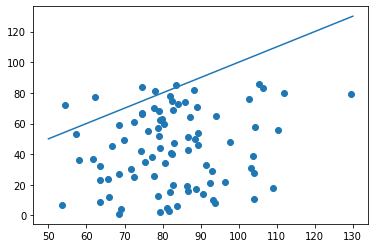

In [77]:
xdata= results.params['Intercept']+ dat['Literacy']+results.params['Literacy']*dat['Literacy']+results.params['np.log(Pop1831)']*np.log(dat['Pop1831'])
plt.scatter(xdata, dat['Lottery'],)
x=np.linspace(50,130,1000)
plt.plot(x,x)

結果の表示

例題は、重回帰（複数の説明変数を使う）回帰なので、説明変数と目的変数の間の関係の可視化は困難です。そこで、説明変数を１つ選択してプロット（部分プロット）をすることができます。

eval_env: 1
eval_env: 1
eval_env: 1


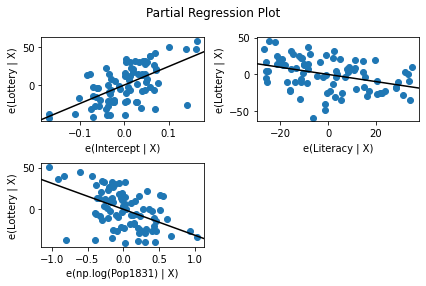

In [78]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

部分回帰グラフを表示してみます。

eval_env: 1


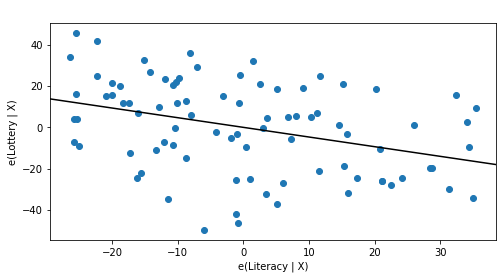

In [79]:
fig, ax = plt.subplots(figsize=(8,4))
ax.title.set_color('white')

plt.style.use('default')
sm.graphics.plot_partregress('Lottery', 'Literacy', ['Pop1831'], ax=ax,
                                data=dat, obs_labels=False);

まとめたもの

In [80]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.90e-08
Time:                        21:50:07   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

R言語の式以外の書き方（もともとのstatsmodelでのモデル入力のやり方）でやるとこうなります。

ここでは$X$を説明変数、$Y$を目的変数とし

$X=\beta_0+\beta_1x$

とし、

$y=X+\epsilon$

ここで、$\beta$は係数、$\epsilon$はノイズである。

$\beta_0=1,\beta_1=0.1$として人工データを生成しそのデータから$\beta$を推定させる。

In [81]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

# 100個のサンプルを生成
nsample = 100
x = np.linspace(0, 10, nsample) # 0から10まで100個等間隔の点列を生成
beta = np.array([1, 0.1]) #人工データでのβ
e = np.random.normal(size=nsample) #ノイズは正規分布から100個生成
X = sm.add_constant(x) # Xは設計行列で、まずはxに定数項を追加
y_true=np.dot(X, beta) # y_trueも確率変数でXと掛け合わせてy_trueを得る
y = y_true + e # y_trueにノイズを付与して人工データyが完成



Xが「設計(design)行列」であることを確認する

In [82]:
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.1010101 ],
       [ 1.        ,  0.2020202 ],
       [ 1.        ,  0.3030303 ],
       [ 1.        ,  0.4040404 ],
       [ 1.        ,  0.50505051],
       [ 1.        ,  0.60606061],
       [ 1.        ,  0.70707071],
       [ 1.        ,  0.80808081],
       [ 1.        ,  0.90909091],
       [ 1.        ,  1.01010101],
       [ 1.        ,  1.11111111],
       [ 1.        ,  1.21212121],
       [ 1.        ,  1.31313131],
       [ 1.        ,  1.41414141],
       [ 1.        ,  1.51515152],
       [ 1.        ,  1.61616162],
       [ 1.        ,  1.71717172],
       [ 1.        ,  1.81818182],
       [ 1.        ,  1.91919192],
       [ 1.        ,  2.02020202],
       [ 1.        ,  2.12121212],
       [ 1.        ,  2.22222222],
       [ 1.        ,  2.32323232],
       [ 1.        ,  2.42424242],
       [ 1.        ,  2.52525253],
       [ 1.        ,  2.62626263],
       [ 1.        ,  2.72727273],
       [ 1.        ,

データをプロットしてみる

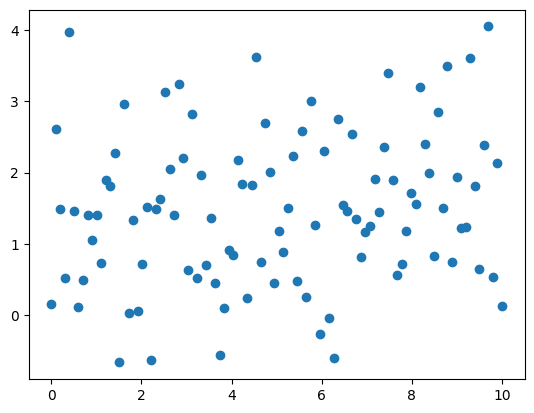

In [83]:
plt.scatter(x,y)

ここから、最小二乗法(OLS)にて回帰係数を求める

In [84]:
# Fit regression model
results = sm.OLS(y, X).fit() #データyに対して設計行列(定数とxで構成)で最小2乗回帰
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.931
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0901
Time:                        21:50:29   Log-Likelihood:                -146.79
No. Observations:                 100   AIC:                             297.6
Df Residuals:                      98   BIC:                             302.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1732      0.211      5.571      0.0

In [85]:
results.params

array([1.17316847, 0.06228625])

In [86]:
results.rsquared

0.029038651902007606

回帰結果を、重ねて表示する。wls_prediction_std関数を使って、95%信頼区間も同時に表示

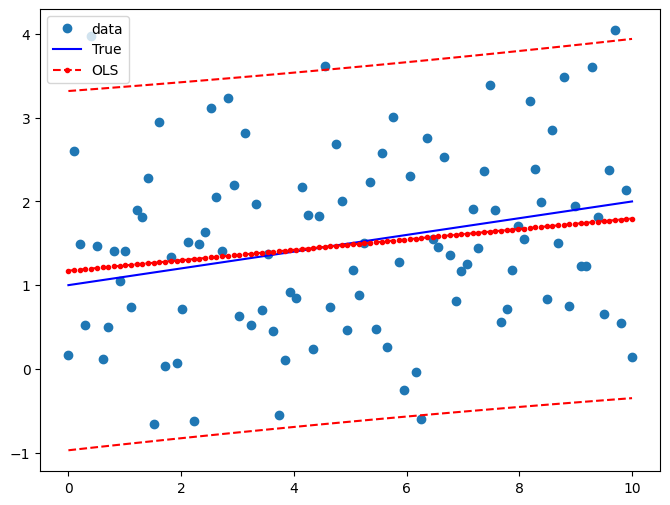

In [87]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

残差を見てみる

(array([ 5.,  8., 16., 15., 22., 14.,  7.,  7.,  5.,  1.]),
 array([-2.15768251, -1.66427675, -1.17087099, -0.67746523, -0.18405946,
         0.3093463 ,  0.80275206,  1.29615782,  1.78956358,  2.28296934,
         2.77637511]),
 <BarContainer object of 10 artists>)

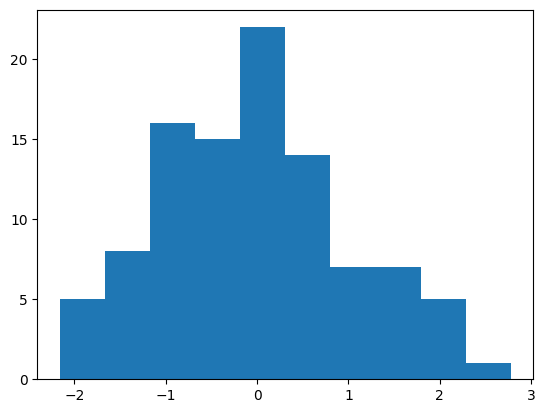

In [88]:
plt.hist(results.resid)

以上の例を、R-styleでもやってみる




In [89]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd

df=pd.DataFrame({'y':y,'x':x})
df

,y,x
0,0.159484,0.00000
1,2.607596,0.10101
2,1.485744,0.20202
3,0.522144,0.30303
4,3.974710,0.40404
...,...,...
95,2.381352,9.59596
96,4.045296,9.69697
97,0.542734,9.79798
98,2.137992,9.89899


In [90]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('y ~ x', data=df).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.931
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0901
Time:                        21:50:53   Log-Likelihood:                -146.79
No. Observations:                 100   AIC:                             297.6
Df Residuals:                      98   BIC:                             302.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1732      0.211      5.571      0.0

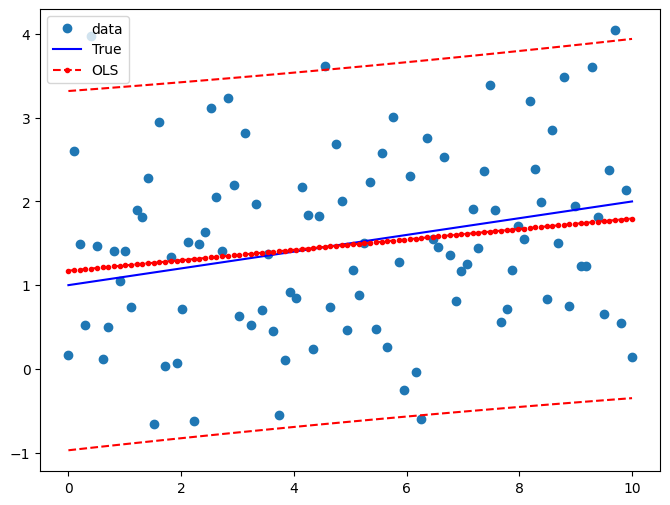

In [91]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## 家計調査

In [92]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

url = 'https://sites.google.com/site/datasciencehiro/datasets/FamilyIncome.csv'
#url = 'datasets/FamilyIncome.csv'
df = pd.read_csv(url, comment='#')
FLAG_fig=True

print(df)

   income  expenditure  engel
0     216       172462   30.8
1     304       204599   29.9
2     356       224776   28.8
3     413       240153   27.8
4     481       255497   27.3
5     555       275490   25.9
6     642       295447   25.7
7     752       323072   24.7
8     902       362769   23.4
9    1461       467616   21.8


In [93]:
df

,income,expenditure,engel
0,216,172462,30.8
1,304,204599,29.9
2,356,224776,28.8
3,413,240153,27.8
4,481,255497,27.3
5,555,275490,25.9
6,642,295447,25.7
7,752,323072,24.7
8,902,362769,23.4
9,1461,467616,21.8


- ols(ordinary least squares、最小2乗)法を用いて単回帰モデルを求める。
- https://en.wikipedia.org/wiki/Ordinary_least_squares データ数 < 20 の場合には、尖度（kurtosis）の評価（olsではkurtosistestと表記）が有効にできないというwarningメッセージが現れるが、ここではこの評価は使わないので無視する。
- scipy.stats.kurtosistest https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kurtosistest.html
- Kurtosis: https://en.wikipedia.org/wiki/Kurtosis

In [94]:
result = smf.ols('expenditure ~ income', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     624.7
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.02e-09
Time:                        21:51:09   Log-Likelihood:                -105.43
No. Observations:                  10   AIC:                             214.9
Df Residuals:                       8   BIC:                             215.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+05   6550.516     21.366      0.0

C:\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [95]:
result.params

Intercept    139956.859032
income          233.856036
dtype: float64

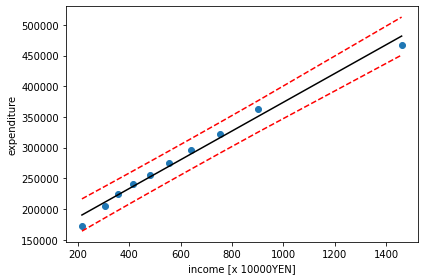

In [98]:
b0, b1 = result.params
prstd, iv_l, iv_u = wls_prediction_std(result)
plt.plot(df['income'],df['expenditure'], 'o')
plt.plot(df['income'], b0+b1*df['income'], c='k')
plt.plot(df['income'], iv_u, 'r--')
plt.plot(df['income'], iv_l, 'r--')
plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')

plt.tight_layout()
if FLAG_fig: plt.savefig('REG_Simple_FamilyIncome1.png')
#plt.show()

予測

In [99]:
NewData = {'income':[1100,1200]}
df_new = pd.DataFrame(NewData)
pred = result.predict(df_new)
pred

0    397198.498402
1    420584.101981
dtype: float64

In [100]:
df_new

,income
0,1100
1,1200


上のグラフを見ると，最低収入と最高収入のデータが最も外れているように見えるので，この2点をはずした回帰分析を再度行う。

In [101]:
df1=df.copy()
df1.drop(9, inplace=True)
df1.drop(0, inplace=True)

In [105]:
result = smf.ols('expenditure ~ income', data=df1).fit()
result.summary()

C:\Python38\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2889.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.78e-09
Time:                        21:53:46   Log-Likelihood:                -73.085
No. Observations:                   8   AIC:                             150.2
Df Residuals:                       6   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.314e+05   2784.282     47.195      0.000    1.25e+05    1.38e+05
income       256.6572      4.775     53.754      0.000     244.974     268.340
==============================================================================
Omnibus:                        3.508   Durbin-Watson:                   1.490
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                1.091
Skew:                          -0.903   Prob(JB):                        0.580
Kurtosis:                       3.086   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

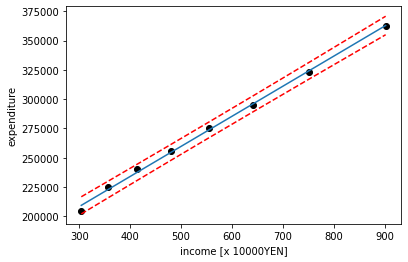

In [107]:
a, b = result.params
prstd, iv_l, iv_u = wls_prediction_std(result)
plt.plot(df1['income'],df1['expenditure'], 'o', c='k')
plt.plot(df1['income'], a+b*df1['income'])
plt.plot(df1['income'], iv_u, 'r--')
plt.plot(df1['income'], iv_l, 'r--')
plt.xlabel('income [x 10000YEN]')
plt.ylabel('expenditure')
plt.show()

95%信頼区間が狭まりました

## 多項式回帰分析
Rデータセットのcarsのデータを用いる。
carsの説明 : 次のサイトからcarsを検索  
https://stat.ethz.ch/R-manual/R-＃#devel/library/datasets/html/00Index.html <br>
このデータを予め取得して、下記のように置いた。<br>
これを読み込み、多項式回帰分析を説明する。<br>

本Notebookと類似のREG_Poly_R_cars.ipynbはRデータセットを読込むために、別途、必要なパッケージを予めインストールして、この上で、Rデータセットを読込む。このインストールを省くことを行ったのが本Notebookである。

In [109]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

FLAG_fig = True

In [110]:
url = "https://sites.google.com/site/datasciencehiro/datasets/cars_R_datasets.csv"
#url = "datasets/cars_R_datasets.csv"
df = pd.read_csv(url)  # read datasets of cars
x = df.speed
df.head()

,Unnamed: 0,speed,dist
0,0,4.0,2.0
1,1,4.0,10.0
2,2,7.0,4.0
3,3,7.0,22.0
4,4,8.0,16.0


#### 1次モデル
$y = b_0 + b_1 x$

In [ ]:
result1 = smf.ols('dist ~ speed', data=df).fit()
print(result1.summary())
b0, b1 = result1.params

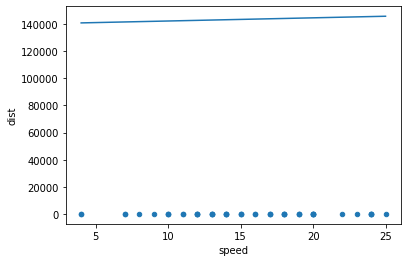

In [111]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x)

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_01.png')

#### 2次モデル
$y = b_0 + b_1 x + b_2 x^2$

In [112]:
result2 = smf.ols('dist ~ np.power(speed,2) + speed', data=df).fit()
print(result2.summary())
b0, b2, b1 = result2.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.14
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           5.85e-12
Time:                        21:55:35   Log-Likelihood:                -205.39
No. Observations:                  50   AIC:                             416.8
Df Residuals:                      47   BIC:                             422.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4701     14

In [ ]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x+b2*(x**2))

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_02.png')

#### 3次モデル
$y = b_0 + b_1  + b_2 x^2 + b_3 x^3$

In [113]:
result3 = smf.ols('dist ~ np.power(speed,3) + np.power(speed,2) + speed', data=df).fit()
print(result3.summary())
b0, b3, b2, b1 = result3.params

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     31.58
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.07e-11
Time:                        21:55:57   Log-Likelihood:                -204.94
No. Observations:                  50   AIC:                             417.9
Df Residuals:                      46   BIC:                             425.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -19.5050     28

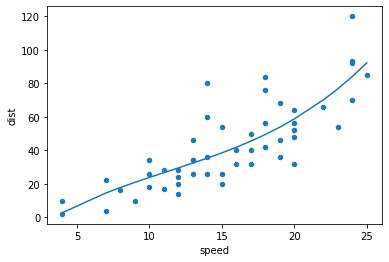

In [114]:
df.plot(kind='scatter', x='speed', y='dist')
plt.plot(x, b0+b1*x+b2*(x**2) + b3*(x**3))

if FLAG_fig: plt.savefig('fig_REG_poy_R_cars_03.png')

## nupmy.polyfit（）を用いたカーブフィッティングの例

[0.0999593  0.91328761 2.47013779]
         2
0.09996 x + 0.9133 x + 2.47


Text(0.5, 1.0, 'degree = 2')

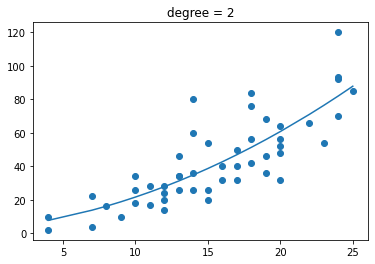

In [115]:
x = df.speed
y = df.dist
degree = 2
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

[ 1.02520479e-02 -3.49657814e-01  6.80110597e+00 -1.95050491e+01]
         3          2
0.01025 x - 0.3497 x + 6.801 x - 19.51


Text(0.5, 1.0, 'degree = 3')

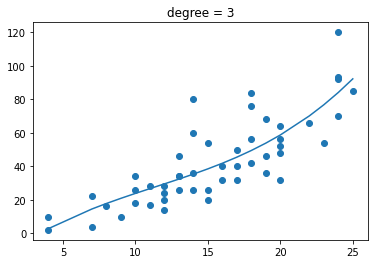

In [116]:
degree = 3
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)

overfittingの例

[-1.20583509e-06  1.58844338e-04 -9.04728719e-03  2.91745289e-01
 -5.85367394e+00  7.55386732e+01 -6.24503022e+02  3.17458505e+03
 -8.94788381e+03  1.05717941e+04]
            9             8            7          6         5         4
-1.206e-06 x + 0.0001588 x - 0.009047 x + 0.2917 x - 5.854 x + 75.54 x
          3        2
 - 624.5 x + 3175 x - 8948 x + 1.057e+04


Text(0.5, 1.0, 'degree = 9')

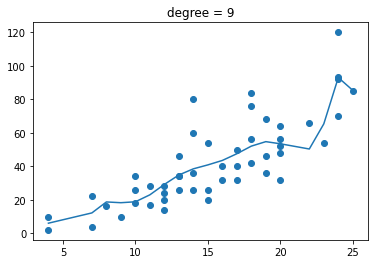

In [117]:
degree = 9
fit = np.polyfit(x, y, degree)
print(fit)
est = np.poly1d(fit)
print(est)
plt.scatter(x,y)
plt.plot(x,est(x))
plt.title('degree = %d' % degree)